Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

In [19]:
yelp_df["loc_rating"] *= 2 # Converting an /5 rating to /10, this is probably inaccurate

all_poi_df = pd.concat([foursquare_df, yelp_df])
all_poi_df

,station_name,station_distance_(m),loc_address,loc_name,loc_category,loc_rating
0,"001023 - River Street , Clerkenwell",23,"25a Lloyd Baker St, London, Greater London, WC...",Myddeltons Delicatessen,Gourmet Store,7.3
1,"001023 - River Street , Clerkenwell",150,"42 Myddelton Square, London, Greater London, E...",Myddelton Square,Park,8.2
2,"001023 - River Street , Clerkenwell",280,"23 Arlington Way, London, Greater London, EC1R...",Present & Correct,Retail,8.8
3,"001023 - River Street , Clerkenwell",294,"96-98 Pentonville Rd, London, Greater London, ...",The Lexington,Rock Club,8.4
4,"001023 - River Street , Clerkenwell",325,"399 St John St, London, Greater London, EC1V 4LD",Turner & George,Butcher,8.8
...,...,...,...,...,...,...
2495,"200191 - Spencer Park, Wandsworth Common",680,64 Battersea Rise,Pizza Metro Pizza,Pizza,8.0
2496,"200191 - Spencer Park, Wandsworth Common",1056,105 Falcon Road,Fish in a Tie,Mediterranean,8.0
2497,"200191 - Spencer Park, Wandsworth Common",598,87 Battersea Rise,Dip & Flip,Burgers,8.0
2498,"200191 - Spencer Park, Wandsworth Common",884,5-9 Battersea Rise,The Breakfast Club,Breakfast & Brunch,8.0


In [20]:
def count_unique_values(column):
    return column.nunique()

grouped_all_poi_df = all_poi_df.groupby("station_name", as_index=False).agg({"station_distance_(m)": np.mean, "loc_address": count_unique_values, "loc_category": count_unique_values, "loc_rating": np.mean})
grouped_all_poi_df = grouped_all_poi_df.rename(columns={"station_distance_(m)": "avg_distance_(m)", "loc_address": "num_locations", "loc_category": "loc_types", "loc_rating": "avg_rating"})
grouped_all_poi_df

,station_name,avg_distance_(m),num_locations,loc_types,avg_rating
0,"000960 - Hop Exchange, The Borough",117.20,20,20,8.615
1,"000968 - Warwick Row, Westminster",242.15,20,19,8.595
2,"000975 - Theobald's Road , Holborn",357.05,19,17,8.595
3,"000978 - Russell Square Station, Bloomsbury",225.05,20,19,8.380
4,"000980 - Malet Street, Bloomsbury",528.95,20,13,8.675
...,...,...,...,...,...
245,"300002 - Brook Green South, Brook Green",423.30,20,16,8.275
246,"300003 - Eel Brook Common, Walham Green",440.50,20,19,8.505
247,"300008 - Normand Park, West Kensington",589.60,20,17,8.425
248,"300010 - Surrey Lane, Battersea",516.50,20,15,8.410


In [21]:
all_data_df = pd.merge(stations_df, grouped_all_poi_df, on="station_name")
all_data_df

,station_name,latitude,longitude,free_bikes,avg_distance_(m),num_locations,loc_types,avg_rating
0,"001023 - River Street , Clerkenwell",51.529163,-0.109971,7,391.20,20,16,8.460
1,"001018 - Phillimore Gardens, Kensington",51.499607,-0.197574,14,161.95,20,16,8.380
2,"001024 - Park Street, Bankside",51.505974,-0.092754,16,158.80,20,20,8.665
3,"001022 - Brunswick Square, Bloomsbury",51.523951,-0.122502,20,253.40,20,17,8.385
4,"000980 - Malet Street, Bloomsbury",51.521681,-0.130432,15,528.95,20,13,8.675
...,...,...,...,...,...,...,...,...
245,"200116 - Vereker Road, West Kensington",51.489591,-0.209379,18,323.90,20,18,8.495
246,"300002 - Brook Green South, Brook Green",51.494347,-0.215805,11,423.30,20,16,8.275
247,"200215 - Greyhound Road, Hammersmith",51.486062,-0.214428,18,536.35,20,18,8.510
248,"200180 - South Park, Sands End",51.467064,-0.193502,22,633.00,20,15,8.015


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

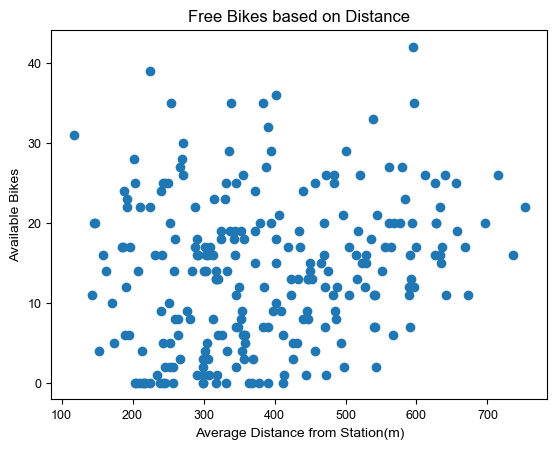

In [22]:
plt.scatter(all_data_df["avg_distance_(m)"], all_data_df["free_bikes"])
plt.xlabel('Average Distance from Station(m)')
plt.ylabel('Available Bikes')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title("Free Bikes based on Distance")
sns.set_theme()
sns.set_style("dark")

plt.show()

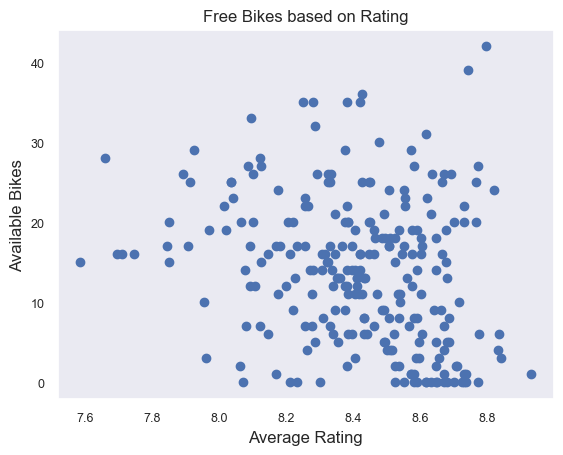

In [23]:
plt.scatter(all_data_df["avg_rating"], all_data_df["free_bikes"])
plt.xlabel('Average Rating')
plt.ylabel('Available Bikes')
plt.title("Free Bikes based on Rating")
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
sns.set_theme()
sns.set_style("dark")

plt.show()

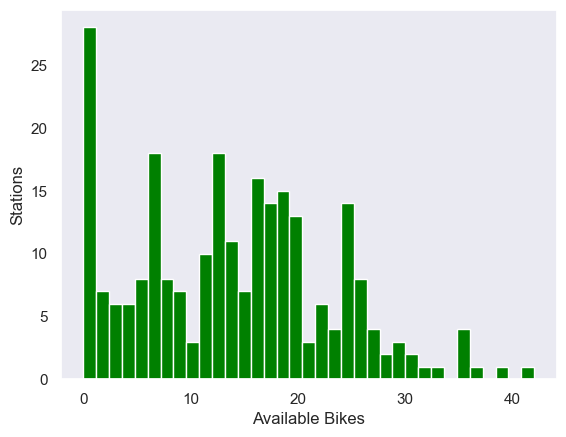

In [24]:
plt.hist(all_data_df["free_bikes"], bins=35, color="green")
plt.xlabel("Available Bikes")
plt.ylabel("Stations")
sns.set_style("dark")
plt.show()

In [ ]:
'''

Initial viewing of the visualized data doesn't show an immediately obvious pattern. Looking at the histogram, while there is not a strong curve yet in the visual, the shape of one is starting to appear.
A bike station is most likely to have 12 available bikes at a time. By comparing that information to the scatterplots, it seems there is a relationship between available bikes and distance, where stations with closer POIs have less
available bikes (<12), perhaps since they are being used more. Similarly, the relationship between available bikes and distance seems to show that there are less available bikes at stations where many POIs have a high rating, also perhaps
since they are being used by people attending those places. The visualizations could be improved with a larger data sample.

'''

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [ ]:
path = "../data/"
db = path + "poi.db"
conn = sql.connect(db)
cursor = conn.cursor()

foursquare_df.to_sql("foursquare_poi", conn, index=False, if_exists="replace")
yelp_df.to_sql("yelp_poi", conn, index=False, if_exists="replace")
all_poi_df.to_sql("all_poi", conn, index=False, if_exists="replace")
all_data_df.to_sql("all_data", conn, index=False, if_exists="replace")
conn.commit()

Look at the data before and after the join to validate your data.

In [ ]:
validation = '''
WITH pre_join AS(
SELECT * FROM foursquare_poi 
UNION 
SELECT * FROM yelp_poi
)

SELECT *
FROM all_poi,
     pre_join
WHERE all_poi.loc_name != pre_join.loc_name
'''

cursor.execute(validation)
validation_results = cursor.fetchall()

for result in validation_results:
    print(result)

cursor.close()
conn.close()

# There was a memory error running this code, even though it has always worked before. In summary, it returns rows from the pre-joined tables involving POI that are not found in the joined table.
# If this code returns nothing then nothing is mismatched, which is what we want.